In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Directory names
datadir = 'data'
hognames = ['ppc10cpb3', 'ppc12cpb3', 'ppc16cpb1', 'ppc16cpb3', 'ppc6cpb3', 'ppc8cpb2', 'ppc8cpb3', 'ppc8cpb4']

In [3]:
def average_rotations(dirname):
    num_rotations = 4
    rotation_dfs = [pd.read_csv('{}/filenames_scores_test{}.txt'.format(dirname, idx), sep=' ')
                    for idx in range(num_rotations)]
    rotation_dfs = [df.rename(columns={'score': 'score{}'.format(idx)})
                    for idx, df in enumerate(rotation_dfs)]
    average_df = reduce(lambda df1, df2: pd.merge(df1, df2.drop(['label'], axis=1), on='filename'), rotation_dfs)
    average_df['score'] = sum(average_df['score{}'.format(idx)] for idx in range(num_rotations)) / float(num_rotations)
    average_df[['filename', 'score', 'label']].to_csv('{}/filenames_scores_avg.csv'.format(dirname), index=False)

In [4]:
# Average over rotations for all HOG parameters and output the file
#for hogname in hognames:
#    for img_type in ['real', 'mock']:
#        average_rotations('{}/{}/{}'.format(datadir, hogname, img_type))

In [5]:
def read_score_file(filename):
    df = pd.read_csv(filename)
    col_names = ['objname', 'obstime', 'band', 'exp_num']
    for idx, col_name in enumerate(col_names):
        df[col_name] = df['filename'].apply(lambda fname: fname.split('_')[idx])
    df['objname'] = df['objname'].apply(lambda name: name.split('/')[-1])
    return df

In [6]:
# Read in the data for HOG parametrization, for real data
filescores_real = {hogname: read_score_file('{}/{}/real/filenames_scores_avg.csv'.format(datadir, hogname))
                   for hogname in hognames}

In [7]:
def get_max_score(filescore_dfs, score_col='score'):
    filescore_dfs = [df.rename(columns={score_col: '{}{}'.format(score_col, idx)})
                     for idx, df in enumerate(filescore_dfs)]
    max_df = reduce(lambda df1, df2: pd.merge(df1, df2[[col for col in df2.columns
                                                        if col == 'filename' or col.startswith(score_col)]],
                                              on='filename'),
                    filescore_dfs)
    max_df[score_col] = [max(row[1]['{}{}'.format(score_col, idx)] for idx, _ in enumerate(filescore_dfs))
                         for row in max_df.iterrows()]
    max_df = max_df.drop(['{}{}'.format(score_col, idx) for idx, _ in enumerate(filescore_dfs)], axis=1)
    return max_df

In [8]:
# Get the max score over HOG parametrizations for each image
filescore_max_real = get_max_score(filescores_real.itervalues())

In [9]:
def plot_scores(filenames, scores, title=None):
    plt.clf()
    plt.figure(figsize=(15,15))
    plt.scatter(range(len(scores)), scores, marker='o')
    plt.xticks(range(len(scores)), filenames, rotation=90)  
    if title:
        plt.title(title)
    plt.show()

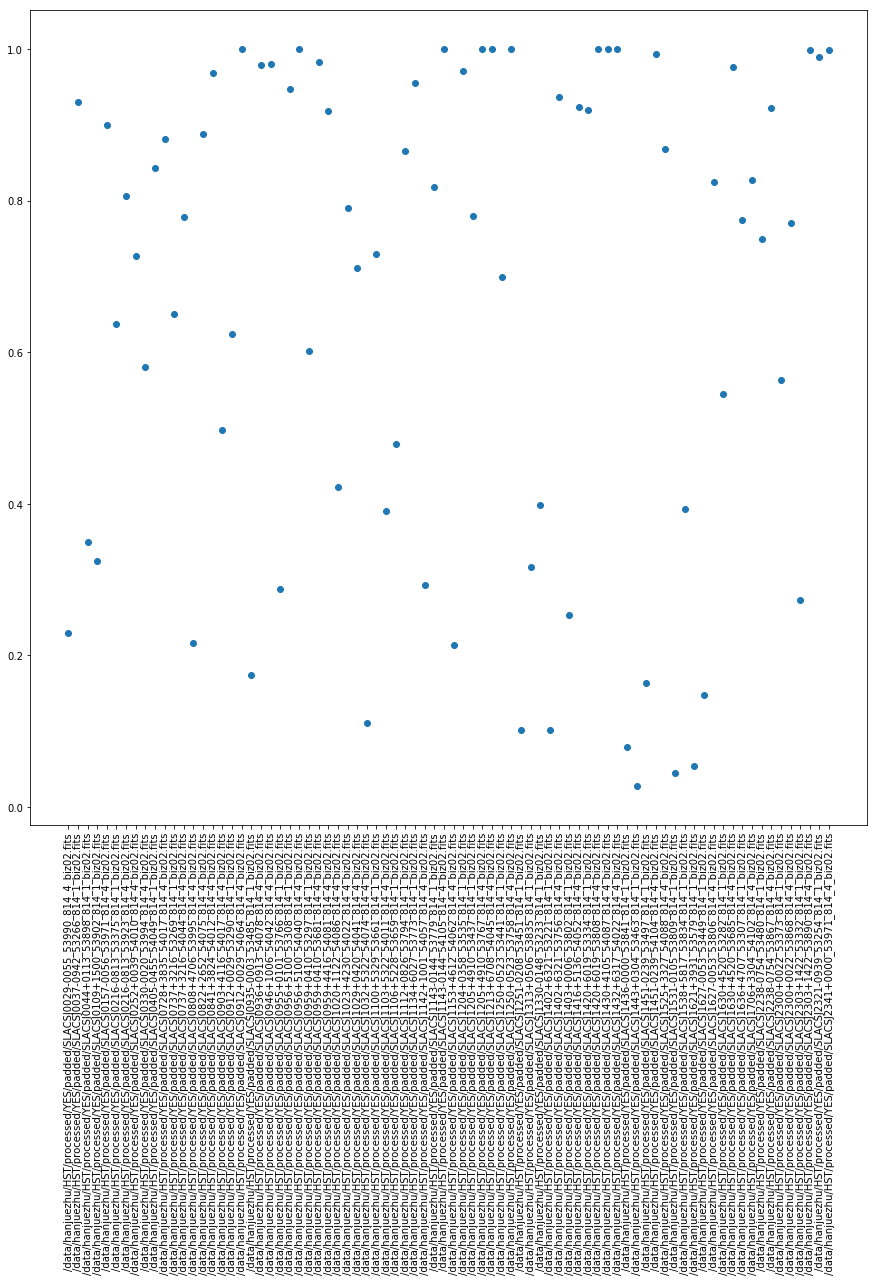

In [10]:
# Plot band 814 lensed
df = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 1)]
plot_scores(df['filename'], df['score'])

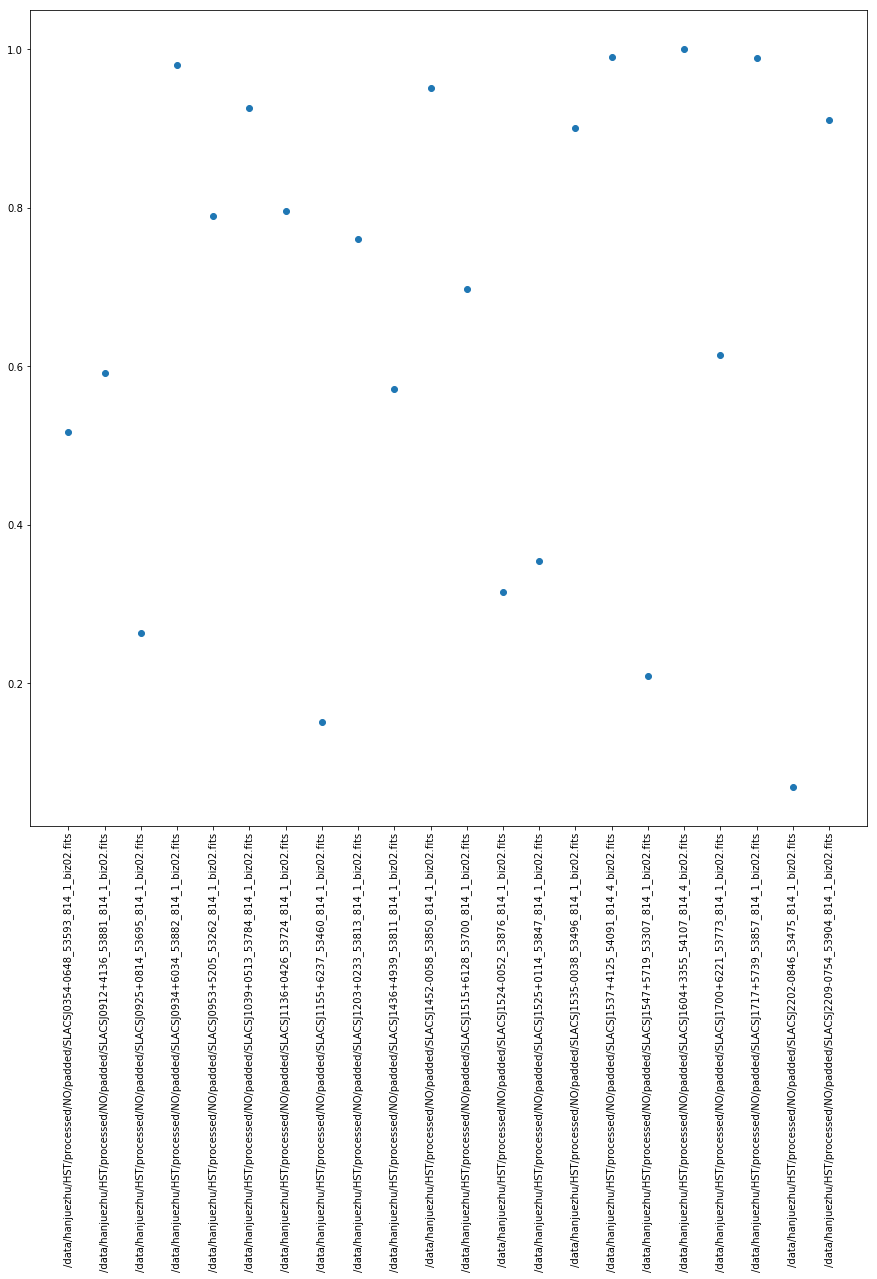

In [11]:
# Plot band 814 non-lensed
df = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 0)]
plot_scores(df['filename'], df['score'])

In [12]:
# Output filenames with lenses that have score < 0.5
bad_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 1) & \
                                   (filescore_max_real['score'] < 0.5)]['filename']
for filename in bad_filenames:
    print filename
    
print
print len(bad_filenames)

/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0029-0055_53990_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0044+0113_53898_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0109+1500_53902_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0808+4706_53995_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0903+4116_54017_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0935-0003_53485_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0955+0101_53766_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1020+1122_54086_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1032+5322_54074_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1103+5322_54011_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1106+5228_53659_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1142+1001_54057_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded

In [13]:
# Output filenames with lenses that have score >= 0.5
good_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 1) & \
                                    (filescore_max_real['score'] >= 0.5)]['filename']
for filename in good_filenames:
    print filename

print
print len(good_filenames)

/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0037-0942_53266_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0157-0056_53971_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0216-0813_53375_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0216-0813_53923_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0252+0039_54010_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0330-0020_53994_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0405-0455_54049_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0728+3835_54017_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_53269_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_54044_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0822+2652_54075_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0841+3824_54012_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded

In [14]:
# Output filenames with no lenses that have score >= 0.5
bad_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 0) & \
                                   (filescore_max_real['score'] >= 0.5)]['filename']
for filename in bad_filenames:
    print filename
    
print
print len(bad_filenames)

/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0354-0648_53593_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0912+4136_53881_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0934+6034_53882_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0953+5205_53262_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1039+0513_53784_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1136+0426_53724_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1203+0233_53813_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1436+4939_53811_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1452-0058_53850_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1515+6128_53700_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1535-0038_53496_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1537+4125_54091_814_4_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1604+3

In [15]:
# Output filenames with no lenses that have score < 0.5
good_filenames = filescore_max_real[(filescore_max_real['band'] == '814') & (filescore_max_real['label'] == 0) & \
                                    (filescore_max_real['score'] < 0.5)]['filename']
for filename in good_filenames:
    print filename
    
print
print len(good_filenames)

/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0925+0814_53695_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1155+6237_53460_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1524-0052_53876_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1525+0114_53847_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1547+5719_53307_814_1_biz02.fits
/data/hanjuezhu/HST/processed/NO/padded/SLACSJ2202-0846_53475_814_1_biz02.fits

6


In [16]:
from sklearn.metrics import roc_auc_score
print roc_auc_score(filescore_max_real['label'], filescore_max_real['score'])

0.558205430933


In [17]:
# Read in the data for HOG parametrization, for mock data
filescores_mock = {hogname: pd.read_csv('{}/{}/mock/filenames_scores_avg.csv'.format(datadir, hogname))
                   for hogname in hognames}

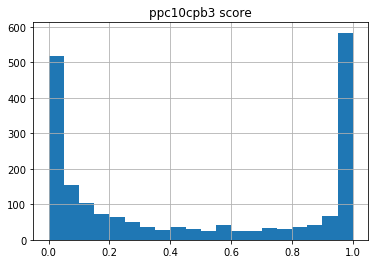

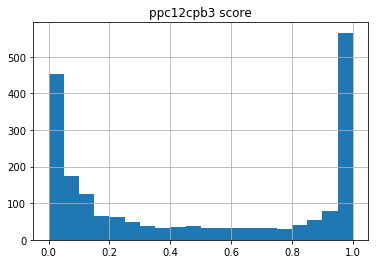

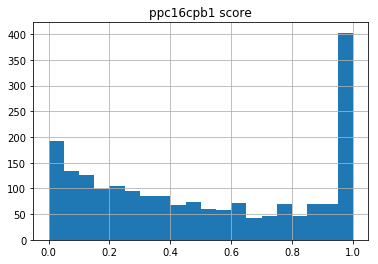

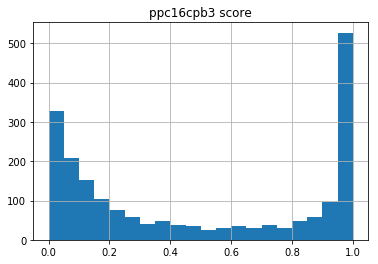

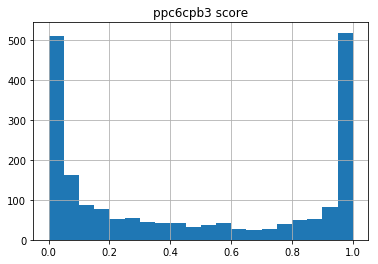

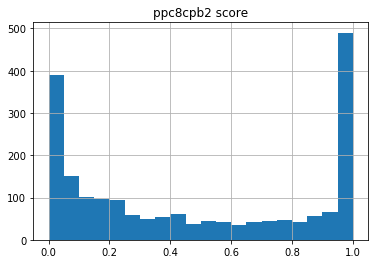

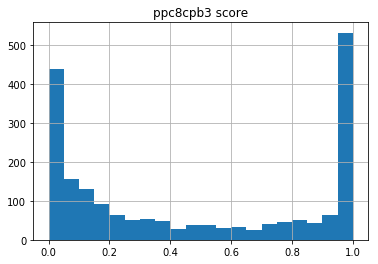

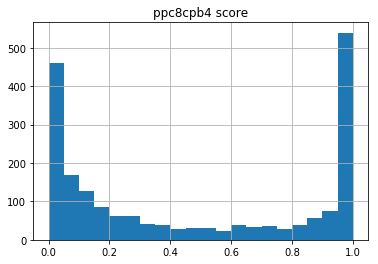

In [18]:
# Draw score histograms for each HOG parametrization
for hogname in hognames:
    filescores_mock[hogname][['score']].rename(columns={'score': '{} score'.format(hogname)}).hist(bins=20)

In [19]:
# Output percentile of the score distribution for each HOG parametrization
quantiles = [df[['score']].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])\
             .reset_index().rename(columns={'index': 'quantile', 'score': hogname})
             for hogname, df in filescores_mock.iteritems()]
quantiles = reduce(lambda df1, df2: pd.merge(df1, df2, on='quantile'), quantiles)
print quantiles.transpose()

                  0         1         2         3         4         5  \
quantile   0.010000  0.050000  0.100000  0.250000  0.500000  0.750000   
ppc16cpb1  0.003498  0.025618  0.051621  0.174992  0.454493  0.884507   
ppc16cpb3  0.001929  0.011757  0.029978  0.089842  0.387263  0.961534   
ppc10cpb3  0.000271  0.002978  0.008842  0.046063  0.352019  0.977681   
ppc6cpb3   0.000357  0.002938  0.008509  0.047744  0.361670  0.956731   
ppc8cpb4   0.000587  0.005094  0.013863  0.056297  0.346915  0.967641   
ppc12cpb3  0.000418  0.004658  0.011881  0.060143  0.399076  0.975512   
ppc8cpb2   0.000392  0.005173  0.014794  0.084907  0.402691  0.939266   
ppc8cpb3   0.000540  0.005149  0.014086  0.066405  0.361655  0.961823   

                  6         7     8  
quantile   0.900000  0.950000  0.99  
ppc16cpb1  0.999158  0.999996  1.00  
ppc16cpb3  0.999842  1.000000  1.00  
ppc10cpb3  0.999954  1.000000  1.00  
ppc6cpb3   0.999843  1.000000  1.00  
ppc8cpb4   0.999912  1.000000  1.00  
ppc

In [20]:
# Get sorted scores for each HOG parametrization for the mock images
sorted_scores = {hogname: df['score'].sort_values() for hogname, df in filescores_mock.iteritems()}

In [21]:
# Add rank score for real images w.r.t. mock images for each HOG parametrization
for hogname, df in filescores_real.iteritems():
    df['rank_score'] = sorted_scores[hogname].searchsorted(df['score']) / float(sorted_scores[hogname].shape[0])

In [22]:
# Get the max rank score over HOG parametrizations for each image
filescore_max_rank_real = get_max_score([df.drop(['score'], axis=1)
                                         for df in filescores_real.itervalues()],
                                        'rank_score')

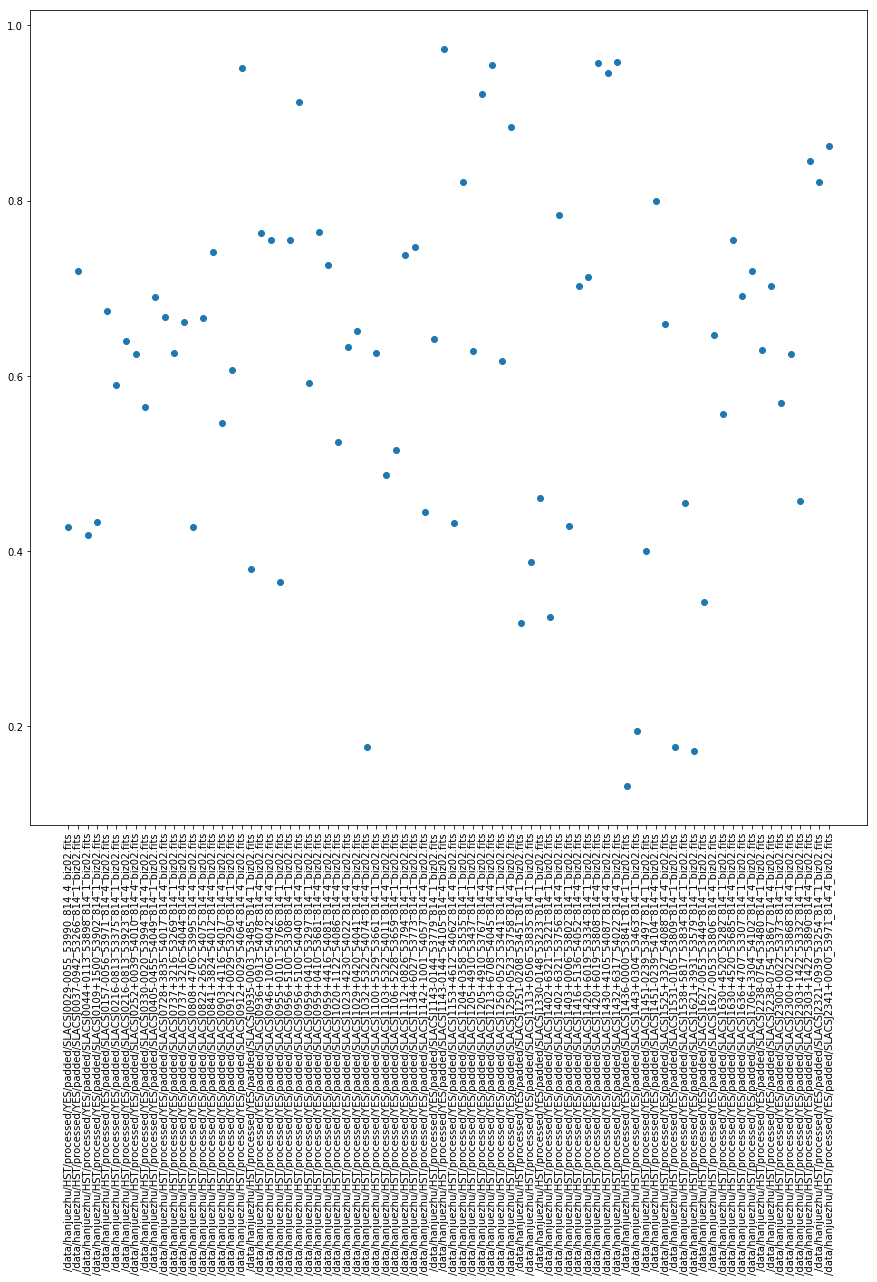

In [23]:
# Plot band 814 lensed
df = filescore_max_rank_real[(filescore_max_rank_real['band'] == '814') & (filescore_max_rank_real['label'] == 1)]
plot_scores(df['filename'], df['rank_score'])

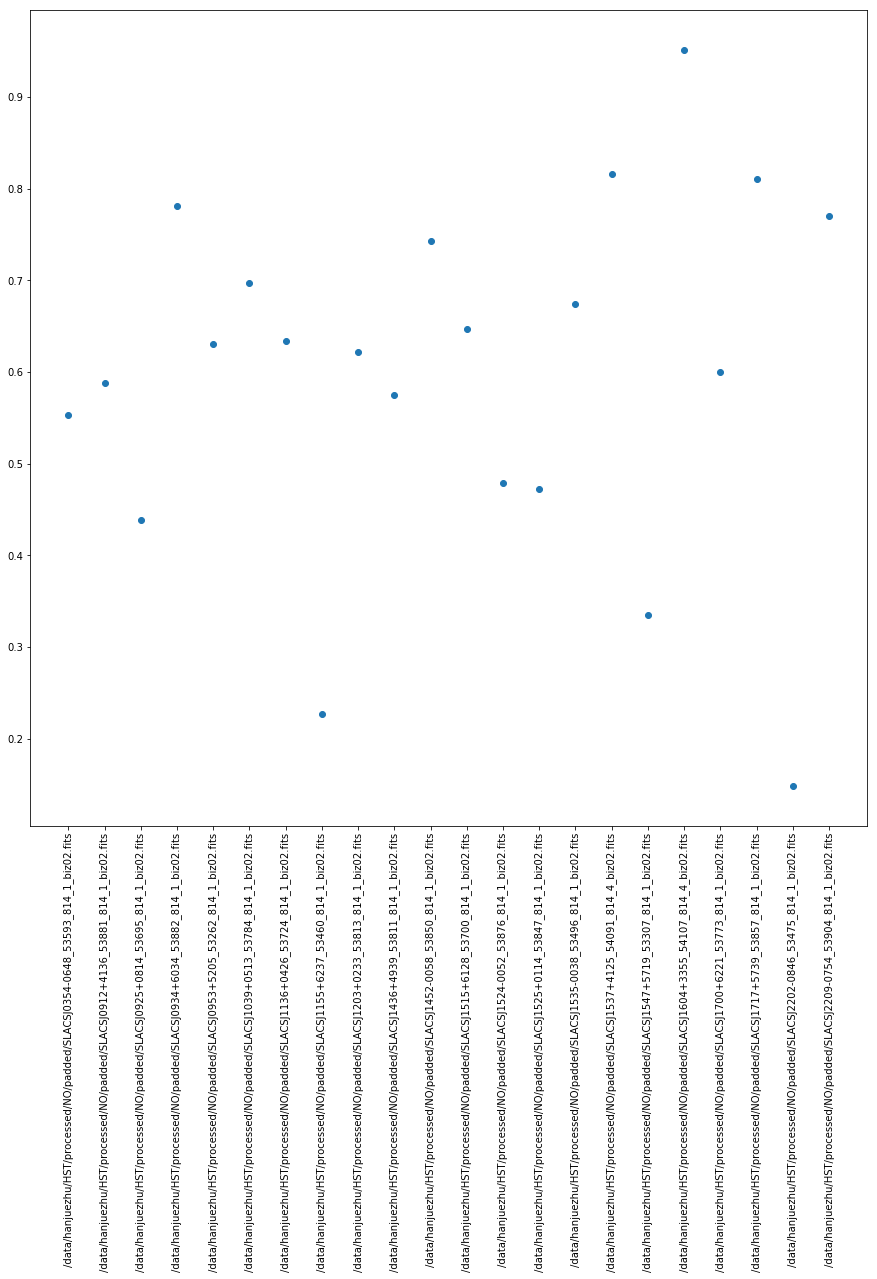

In [24]:
# Plot band 814 non-lensed
df = filescore_max_rank_real[(filescore_max_rank_real['band'] == '814') & (filescore_max_rank_real['label'] == 0)]
plot_scores(df['filename'], df['rank_score'])

In [25]:
def get_good_hog_parametrizations(filescores_real):
    hognames = filescores_real.keys()
    filescores_real = {hogname: df.rename(columns={'score': hogname}).drop(['rank_score'], axis=1)
                       for hogname, df in filescores_real.iteritems()}
    filescores_real = reduce(lambda (hogname1, df1), (hogname2, df2): ('',
                                                                       pd.merge(df1,
                                                                                df2[['filename', hogname2]],
                                                                                on='filename')
                                                                       ),
                             filescores_real.iteritems())[1]

    def get_good_hognames(row):
        if row['label'] == 1:
            return [hogname for hogname in hognames if row[hogname] > 0.5]
        elif row['label'] == 0:
            return [hogname for hogname in hognames if row[hogname] <= 0.5]
        
    filescores_real['good_hog_params'] = [get_good_hognames(row) for idx, row in filescores_real.iterrows()]
    filescores_real['num_good_hog_params'] = filescores_real['good_hog_params'].apply(len)
    return filescores_real.drop(hognames, axis=1)

In [26]:
# For each image, get the list of "good" HOG parametrizations, which are the
# ones that predict correctly
good_hog_parameters = get_good_hog_parametrizations(filescores_real)

In [27]:
# How many good HOG parametrizations does each (lensed) image have?
# I.e. How many have 0, 1, 2, ..., len(filescores_real) good parametrizations?
from collections import Counter
sorted(Counter(good_hog_parameters[good_hog_parameters['label'] == 1]['num_good_hog_params']).iteritems(), key=lambda (k, v): k)

[(0, 53), (1, 13), (2, 11), (3, 4), (4, 5), (5, 3), (6, 3), (7, 8), (8, 21)]

In [28]:
# How many good HOG parametrizations does each (unlensed) image have?
# I.e. How many have 0, 1, 2, ..., len(filescores_real) good parametrizations?
from collections import Counter
sorted(Counter(good_hog_parameters[good_hog_parameters['label'] == 0]['num_good_hog_params']).iteritems(), key=lambda (k, v): k)

[(0, 3), (2, 1), (4, 2), (5, 1), (6, 5), (7, 9), (8, 14)]

In [29]:
# Which lensed images have 0 and which have len(filescores_real) good parametrizations
bad_names = good_hog_parameters[(good_hog_parameters['label'] == 1) & \
                                (good_hog_parameters['num_good_hog_params'] == 0)]['filename']
good_names = good_hog_parameters[(good_hog_parameters['label'] == 1) & \
                                 (good_hog_parameters['num_good_hog_params'] == len(filescores_real))]['filename']

In [30]:
for filename in bad_names:
    print filename

/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0029-0055_53990_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0044+0113_53898_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0109+1500_53902_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0216-0813_53375_435_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_53269_435_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_54044_555_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0808+4706_53995_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0903+4116_54017_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0935-0003_53485_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0955+0101_53766_435_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0955+0101_53766_814_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0956+5100_53308_435_1_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded

In [31]:
for filename in good_names:
    print filename

/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0822+2652_54075_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0912+0029_54064_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0936+0913_54078_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0956+5100_54040_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0959+0410_53681_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0959+4416_54081_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1143-0144_54105_555_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1143-0144_54105_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1205+4910_53767_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1213+6708_54045_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1250+0523_53758_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1416+5136_54052_814_4_biz02.fits
/data/hanjuezhu/HST/processed/YES/padded

In [32]:
# Compute AUC for each HOG parametrization separately
for hogname, df in filescores_real.iteritems():
    print hogname
    print roc_auc_score(df['label'], df['score'])
    print

ppc16cpb1
0.508854781582

ppc16cpb3
0.579693034238

ppc10cpb3
0.565997638725

ppc6cpb3
0.469657615112

ppc8cpb4
0.573553719008

ppc12cpb3
0.611806375443

ppc8cpb2
0.54025974026

ppc8cpb3
0.566233766234



In [33]:
# Get the max score over HOG parametrizations with AUC > 0.57 for each image
filescore_max_real = get_max_score([df.drop(['rank_score'], axis=1)
                                    for hogname, df in filescores_real.iteritems()
                                    if hogname in {'ppc16cpb3', 'ppc8cpb4', 'ppc12cpb3'}])

In [34]:
# Calculate AUC of max score
roc_auc_score(filescore_max_real['label'], filescore_max_real['score'])

0.5806375442739079

In [35]:
def get_agg_score(filescore_dfs, score_col='score', agg_func=max):
    """Generalization of get_max_score"""
    filescore_dfs = [df.rename(columns={score_col: '{}{}'.format(score_col, idx)})
                     for idx, df in enumerate(filescore_dfs)]
    max_df = reduce(lambda df1, df2: pd.merge(df1, df2[[col for col in df2.columns
                                                        if col == 'filename' or col.startswith(score_col)]],
                                              on='filename'),
                    filescore_dfs)
    max_df[score_col] = [agg_func(row[1]['{}{}'.format(score_col, idx)] for idx, _ in enumerate(filescore_dfs))
                         for row in max_df.iterrows()]
    max_df = max_df.drop(['{}{}'.format(score_col, idx) for idx, _ in enumerate(filescore_dfs)], axis=1)
    return max_df

In [36]:
# Get the average score over HOG parametrizations with AUC > 0.57 for each image
filescore_avg_real = get_agg_score([df.drop(['rank_score'], axis=1)
                                    for hogname, df in filescores_real.iteritems()
                                    if hogname in {'ppc16cpb3', 'ppc8cpb4', 'ppc12cpb3'}],
                                   agg_func=lambda itr: np.mean(list(itr)))

In [37]:
# Calculate AUC of average score
roc_auc_score(filescore_avg_real['label'], filescore_avg_real['score'])

0.58559622195985828

In [38]:
# Get the average score of the two highest scores over HOG parametrizations with AUC > 0.57 for each image
filescore_top2_real = get_agg_score([df.drop(['rank_score'], axis=1)
                                     for hogname, df in filescores_real.iteritems()
                                     if hogname in {'ppc16cpb3', 'ppc8cpb4', 'ppc12cpb3'}],
                                    agg_func=lambda itr: np.mean(sorted(itr)[-2:]))

In [39]:
# Calculate AUC of average of two highest scores
roc_auc_score(filescore_top2_real['label'], filescore_top2_real['score'])

0.58276269185360097

In [40]:
# Get the max score over HOG parametrizations with AUC > 0.5 for each image
filescore_max_real = get_max_score([df.drop(['rank_score'], axis=1)
                                    for hogname, df in filescores_real.iteritems()
                                    if hogname != 'ppc6cpb3'])

In [41]:
# Calculate AUC of max score
roc_auc_score(filescore_max_real['label'], filescore_max_real['score'])

0.56174734356552547

In [42]:
# Get the average score over HOG parametrizations with AUC > 0.5 for each image
filescore_avg_real = get_agg_score([df.drop(['rank_score'], axis=1)
                                    for hogname, df in filescores_real.iteritems()
                                    if hogname != 'ppc6cpb3'],
                                   agg_func=lambda itr: np.mean(list(itr)))

In [43]:
# Calculate AUC of average score
roc_auc_score(filescore_avg_real['label'], filescore_avg_real['score'])

0.57190082644628104

In [44]:
# Get the average score of the two highest scores over HOG parametrizations with AUC > 0.5 for each image
filescore_top2_real = get_agg_score([df.drop(['rank_score'], axis=1)
                                     for hogname, df in filescores_real.iteritems()
                                     if hogname != 'ppc6cpb3'],
                                    agg_func=lambda itr: np.mean(sorted(itr)[-2:]))

In [45]:
# Calculate AUC of average of two highest scores
roc_auc_score(filescore_top2_real['label'], filescore_top2_real['score'])

0.56316410861865407

In [50]:
# Number of unique lens objects and unique non-lens across all bands (SLACSJ....).
print filescore_avg_real[filescore_avg_real['label'] == 1]['objname'].unique().shape
print filescore_avg_real[filescore_avg_real['label'] == 0]['objname'].unique().shape

(64,)
(27,)


In [57]:
# Number of objects with multiple bands
counts = Counter(filescore_avg_real[['objname', 'band']].drop_duplicates()['objname'])
print len([True for count in counts.itervalues() if count > 1])

34


In [66]:
# Number of objects with multiple exposures in the same band (e.g. 814_1 and 814_4)
df = filescore_avg_real[['objname', 'band']].assign(count=1).groupby(['objname', 'band'], as_index=False).sum()
print df[df['count'] > 1]['objname'].unique().shape

(16,)


In [75]:
# Examples of the biggest change in score (positive change and negative change) between ppc16cpb3 and ppc12cpb3.
compare = pd.merge(filescores_real['ppc16cpb3'].rename(columns={'score': 'ppc16cpb3'})[['filename', 'label', 'ppc16cpb3']],
                   filescores_real['ppc12cpb3'].rename(columns={'score': 'ppc12cpb3'})[['filename', 'ppc12cpb3']],
                   on='filename')
compare['16_minus_12'] = compare['ppc16cpb3'] - compare['ppc12cpb3']
compare = compare.sort_values('16_minus_12')

In [79]:
compare.head(6)

,filename,label,ppc16cpb3,ppc12cpb3,16_minus_12
45,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.071494,0.458454,-0.386960
126,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.352045,0.733357,-0.381312
18,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0,0.116106,0.465576,-0.349469
52,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.068148,0.370673,-0.302526
148,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.469206,0.745864,-0.276658
24,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0,0.346066,0.606390,-0.260324


In [83]:
list(compare.head(6)['filename'])

['/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0252+0039_54010_814_4_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1525+3327_54088_814_4_biz02.fits',
 '/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1452-0058_53850_814_1_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ0737+3216_54044_814_4_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ2300+0022_53868_814_4_biz02.fits',
 '/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1535-0038_53496_814_1_biz02.fits']

In [80]:
compare.tail(6)

,filename,label,ppc16cpb3,ppc12cpb3,16_minus_12
20,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0,0.396201,0.129711,0.266490
16,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0,0.467263,0.167944,0.299319
142,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.603796,0.274718,0.329078
146,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.422577,0.093491,0.329086
143,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.414349,0.071581,0.342768
94,/data/hanjuezhu/HST/processed/YES/padded/SLACS...,1,0.780315,0.377969,0.402346


In [84]:
list(compare.tail(6)['filename'])

['/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1515+6128_53700_814_1_biz02.fits',
 '/data/hanjuezhu/HST/processed/NO/padded/SLACSJ1203+0233_53813_814_1_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ2238-0754_53480_814_1_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ2300+0022_53373_814_1_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ2238-0754_53867_555_4_biz02.fits',
 '/data/hanjuezhu/HST/processed/YES/padded/SLACSJ1205+4910_53437_814_1_biz02.fits']

In [85]:
compare.to_csv('compare_params.csv', index=False)

In [86]:
# How many lens and non-lens images are there?
print filescore_avg_real[filescore_avg_real['label'] == 0].shape
print filescore_avg_real[filescore_avg_real['label'] == 1].shape

(35, 7)
(121, 7)


Previous Code

In [4]:
name_test = filescores['ppc12cpb3']['filename'][0]

In [5]:
name_test.split('_')

['/data/hanjuezhu/HST/processed/NO/padded/SLACSJ0354-0648',
 '53593',
 '435',
 '1',
 'biz02.fits']

In [6]:
def new_fields_by_band(row) :
    objname, obstime, band, exposure, ext = row.filename.split('_')
    objname = objname.split('/')[-1]
    return {'objname': objname, 'obstime': obstime, 'band': band, 'exp_num': exposure }

In [7]:
for hn in hognames:
    for col in ['objname','obstime','band','exp_num'] :
        filescores[hn][col] = filescores['ppc12cpb3'].apply(lambda row: new_fields_by_band(row)[col], axis=1)

In [8]:
for hn in hognames:
    for col in ['objname','obstime','band','exp_num'] :
        filescores[hn][col] = filescores['ppc16cpb1'].apply(lambda row: new_fields_by_band(row)[col], axis=1)

In [9]:
filescores['ppc16cpb1']

,filename,score,label,objname,obstime,band,exp_num
0,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.294950,0,SLACSJ0354-0648,53593,435,1
1,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.410859,0,SLACSJ0354-0648,53593,814,1
2,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.665510,0,SLACSJ0847+0318,53749,435,1
3,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.252739,0,SLACSJ0912+4136,53881,814,1
4,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.472611,0,SLACSJ0925+0814,53695,435,1
5,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.037042,0,SLACSJ0925+0814,53695,814,1
6,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.400402,0,SLACSJ0934+6034,53882,814,1
7,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.106687,0,SLACSJ0953+5205,53262,435,1
8,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.242123,0,SLACSJ0953+5205,53262,814,1
9,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.362538,0,SLACSJ1039+0513,53784,814,1


In [10]:
for hn in hognames:
    for col in ['objname','obstime','band','exp_num'] :
        filescores[hn][col] = filescores['ppc8cpb3'].apply(lambda row: new_fields_by_band(row)[col], axis=1)

In [11]:
filescores['ppc8cpb3']

,filename,score,label,objname,obstime,band,exp_num
0,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.012913,0,SLACSJ0354-0648,53593,435,1
1,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.481657,0,SLACSJ0354-0648,53593,814,1
2,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.007266,0,SLACSJ0847+0318,53749,435,1
3,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.061945,0,SLACSJ0912+4136,53881,814,1
4,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.759861,0,SLACSJ0925+0814,53695,435,1
5,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.004448,0,SLACSJ0925+0814,53695,814,1
6,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.133975,0,SLACSJ0934+6034,53882,814,1
7,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.056806,0,SLACSJ0953+5205,53262,435,1
8,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.113077,0,SLACSJ0953+5205,53262,814,1
9,/data/hanjuezhu/HST/processed/NO/padded/SLACSJ...,0.896583,0,SLACSJ1039+0513,53784,814,1


In [12]:
filename = list(filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '814'].loc[filescores['ppc12cpb3']['label']==1]['objname'])
print filename, len(filename)

['SLACSJ0029-0055', 'SLACSJ0037-0942', 'SLACSJ0044+0113', 'SLACSJ0109+1500', 'SLACSJ0157-0056', 'SLACSJ0216-0813', 'SLACSJ0216-0813', 'SLACSJ0252+0039', 'SLACSJ0330-0020', 'SLACSJ0405-0455', 'SLACSJ0728+3835', 'SLACSJ0737+3216', 'SLACSJ0737+3216', 'SLACSJ0808+4706', 'SLACSJ0822+2652', 'SLACSJ0841+3824', 'SLACSJ0903+4116', 'SLACSJ0912+0029', 'SLACSJ0912+0029', 'SLACSJ0935-0003', 'SLACSJ0936+0913', 'SLACSJ0946+1006', 'SLACSJ0955+0101', 'SLACSJ0956+5100', 'SLACSJ0956+5100', 'SLACSJ0959+0410', 'SLACSJ0959+0410', 'SLACSJ0959+4416', 'SLACSJ1020+1122', 'SLACSJ1023+4230', 'SLACSJ1029+0420', 'SLACSJ1032+5322', 'SLACSJ1100+5329', 'SLACSJ1103+5322', 'SLACSJ1106+5228', 'SLACSJ1112+0826', 'SLACSJ1134+6027', 'SLACSJ1142+1001', 'SLACSJ1143-0144', 'SLACSJ1143-0144', 'SLACSJ1153+4612', 'SLACSJ1204+0358', 'SLACSJ1205+4910', 'SLACSJ1205+4910', 'SLACSJ1213+6708', 'SLACSJ1250+0523', 'SLACSJ1250+0523', 'SLACSJ1251-0208', 'SLACSJ1313+0506', 'SLACSJ1330-0148', 'SLACSJ1402+6321', 'SLACSJ1402+6321', 'SLACSJ1403

In [13]:
ppc12cpb3_lensed_814 = filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '814'].loc[filescores['ppc12cpb3']['label']==1]

In [14]:
ppc16cpb1_lensed_814 = filescores['ppc16cpb1'].loc[filescores['ppc16cpb1']['band'] == '814'].loc[filescores['ppc16cpb1']['label']==1]

In [15]:
ppc8cpb3_lensed_814 = filescores['ppc8cpb3'].loc[filescores['ppc8cpb3']['band'] == '814'].loc[filescores['ppc8cpb3']['label']==1]

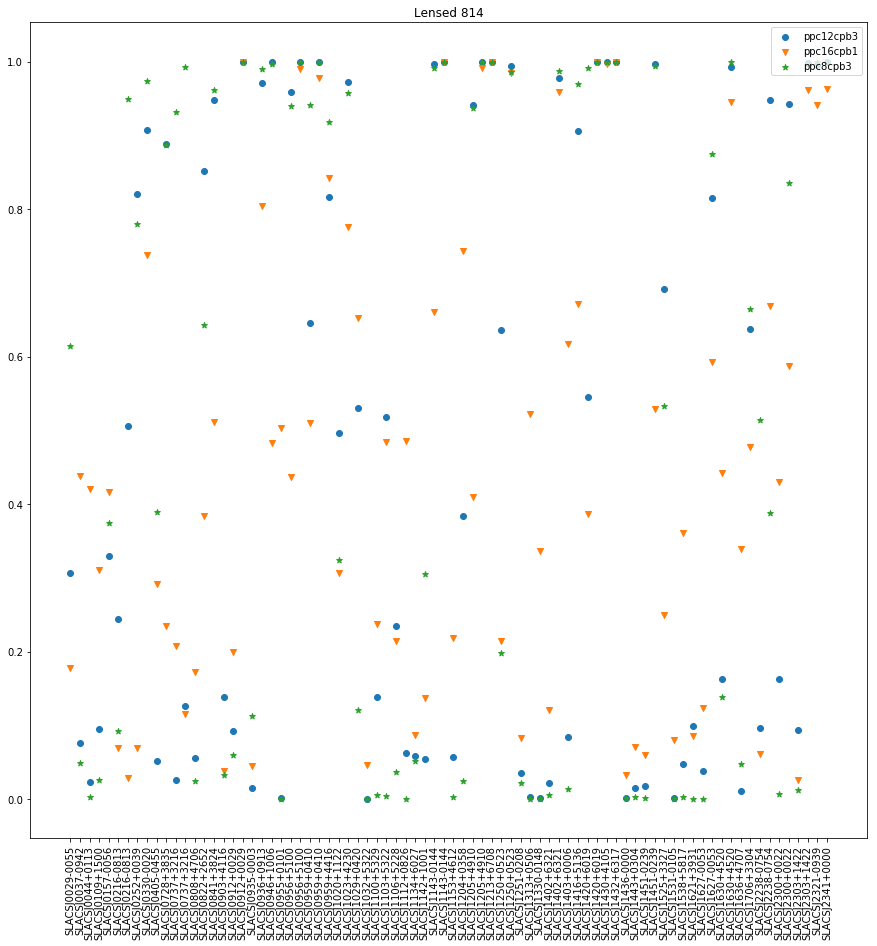

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(range(len(list(ppc12cpb3_lensed_814['score']))),list(ppc12cpb3_lensed_814['score']), marker='o',label= 'ppc12cpb3')
plt.scatter(range(len(list(ppc16cpb1_lensed_814['score']))),list(ppc16cpb1_lensed_814['score']), marker='v', label= 'ppc16cpb1')
plt.scatter(range(len(list(ppc8cpb3_lensed_814['score']))),list(ppc8cpb3_lensed_814['score']), marker='*', label= 'ppc8cpb3')
plt.xticks(range(len(list(ppc12cpb3_lensed_814['score']))), filename, rotation=90)  
plt.title('Lensed 814')
plt.legend(loc='upper right')
plt.show()

In [17]:
print sum(ppc12cpb3_lensed_814['score'])
print sum(ppc8cpb3_lensed_814['score'])
print sum(ppc16cpb1_lensed_814['score'])

39.3068738257
39.626904718
36.7774701396


In [18]:
ppc12cpb3_lensed_435 = filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '435'].loc[filescores['ppc12cpb3']['label']==1]
ppc16cpb1_lensed_435 = filescores['ppc16cpb1'].loc[filescores['ppc16cpb1']['band'] == '435'].loc[filescores['ppc16cpb1']['label']==1]
ppc8cpb3_lensed_435 = filescores['ppc8cpb3'].loc[filescores['ppc8cpb3']['band'] == '435'].loc[filescores['ppc8cpb3']['label']==1]
filename = list(filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '435'].loc[filescores['ppc12cpb3']['label']==1]['objname'])

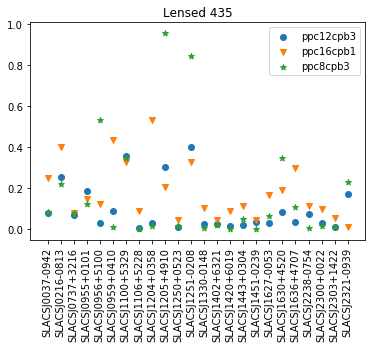

In [19]:
plt.figure()
plt.scatter(range(len(list(ppc12cpb3_lensed_435['score']))),list(ppc12cpb3_lensed_435['score']), marker='o',label= 'ppc12cpb3')
plt.scatter(range(len(list(ppc16cpb1_lensed_435['score']))),list(ppc16cpb1_lensed_435['score']), marker='v', label= 'ppc16cpb1')
plt.scatter(range(len(list(ppc8cpb3_lensed_435['score']))),list(ppc8cpb3_lensed_435['score']), marker='*', label= 'ppc8cpb3')
plt.xticks(range(len(list(ppc8cpb3_lensed_435['score']))), filename, rotation=90)  
plt.title('Lensed 435')
plt.legend(loc='upper right')
plt.show()

In [21]:
ppc12cpb3_unlensed_814 = filescores['ppc12cpb3'].loc[filescores['ppc12cpb3']['band'] == '814'].loc[filescores['ppc12cpb3']['label']==0]
ppc16cpb1_unlensed_814 = filescores['ppc16cpb1'].loc[filescores['ppc16cpb1']['band'] == '814'].loc[filescores['ppc16cpb1']['label']==0]
ppc8cpb3_unlensed_814 = filescores['ppc8cpb3'].loc[filescores['ppc8cpb3']['band'] == '814'].loc[filescores['ppc8cpb3']['label']==0]

In [48]:
max_score_lensed = ppc12cpb3_lensed_814[['filename']]
max_score_lensed['max_score'] = [max(scores) for scores in zip(ppc12cpb3_lensed_814['score'],
                                                               ppc16cpb1_lensed_814['score'],
                                                               ppc8cpb3_lensed_814['score'])]

/Users/f566998/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


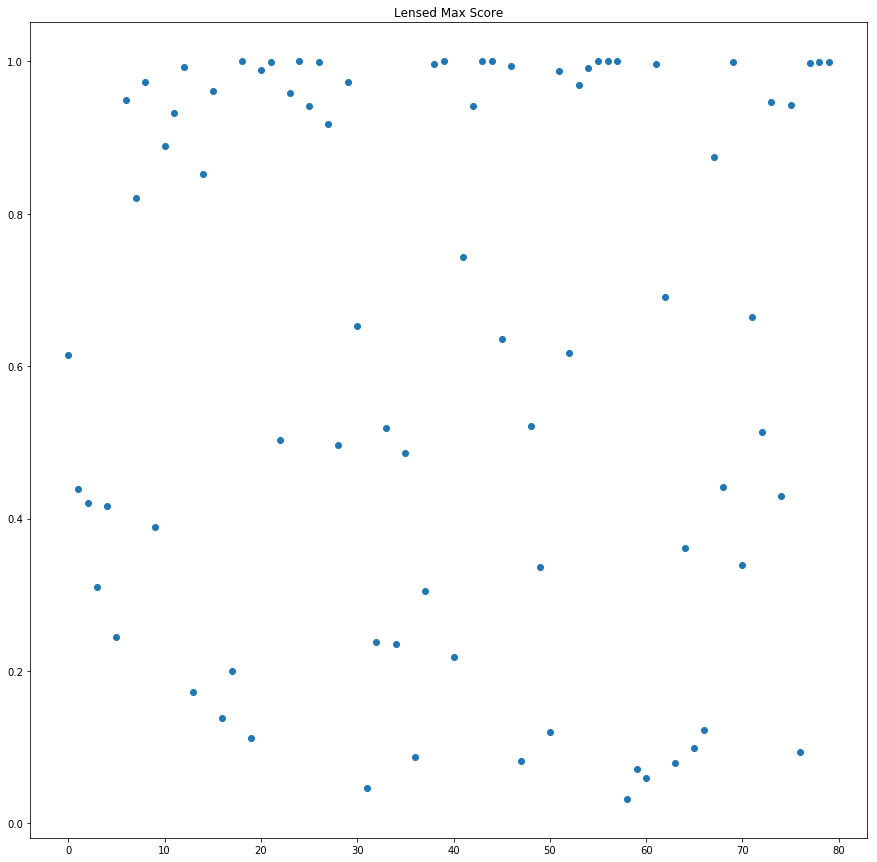

In [49]:
plt.clf()
plt.figure(figsize=(15,15))
plt.scatter(range(len(max_score_lensed['max_score'])),max_score_lensed['max_score'], marker='o')
plt.title('Lensed Max Score')
plt.show()

In [50]:
max_score_unlensed = ppc12cpb3_unlensed_814[['filename']]
max_score_unlensed['max_score'] = [max(scores) for scores in zip(ppc12cpb3_unlensed_814['score'],
                                                                 ppc16cpb1_unlensed_814['score'],
                                                                 ppc8cpb3_unlensed_814['score'])]

/Users/f566998/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


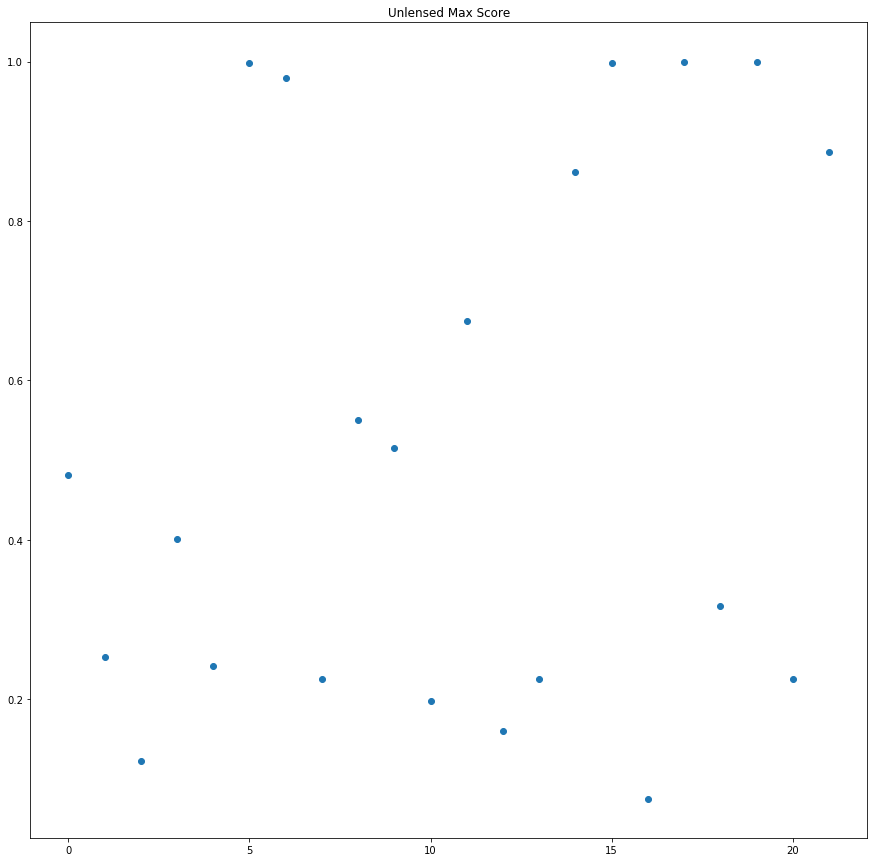

In [51]:
plt.clf()
plt.figure(figsize=(15,15))
plt.scatter(range(len(max_score_unlensed['max_score'])),max_score_unlensed['max_score'], marker='o')
plt.title('Unlensed Max Score')
plt.show()